In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 

In [2]:
boston = pd.read_csv ('./BostonHousing.csv')
boston.head ()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop ('medv', axis = 1)
y = boston['medv']

In [4]:
X.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2  

In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_tranform = sc.fit_transform (X)
X_tranform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [7]:
def predict (weight, x, bias):
    y_pred = list ()
    for _ in range (len (x)):
        y_pred.append (weight @ x[_] + bias)
    return np.array (y_pred)

In [8]:
def loss (y_true, y_pred):
    loss, n = 0, len (y_true)
    for _ in range (n):
        loss += (y_true[_] - y_pred[_])**2
    return (1/n) * loss

In [9]:
def del_dw (x, y_true, y_pred):
    loss, n = 0, len (y_true)
    for _ in range (n):
        loss += -x[_] * (y_true[_] - y_pred[_])
    return (2/n) * loss

In [10]:
def del_db (y_true, y_pred):
    loss, n = 0, len (y_true)
    for _ in range (n):
        loss += - (y_true[_] - y_pred[_])
    return (2/n) * loss

In [11]:
X.shape

(506, 13)

In [14]:
def gradient_descent (x, y_true):
    weights = np.random.randn (x.shape[1])
    bias = 0
    epochs = 2000
    n = len (x)
    loss_function = list ()
    learning_rate = 0.001

    for i in range (epochs):
        y_pred = predict (weights, x, bias)
        weights = weights - learning_rate * del_dw (x, y_true, y_pred)
        bias = bias - learning_rate * del_db (y_true, y_pred)
        loss_function.append (loss (y_true, y_pred))

    plt.plot (np.arange (1, epochs), loss_function[1:])
    plt.xlabel ('Number of Epochs')
    plt.ylabel ('Loss')

    return weights, bias

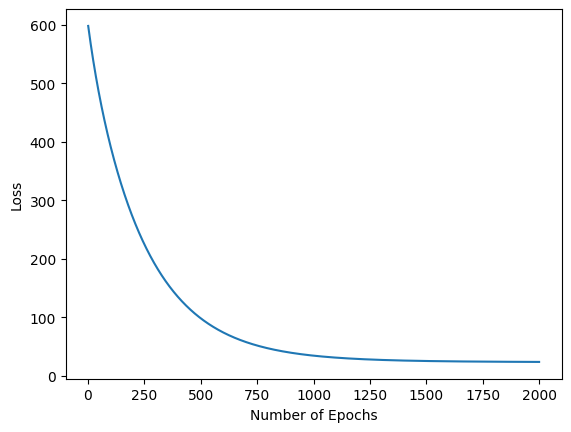

In [15]:
w, b = gradient_descent (X_tranform, y)

In [16]:
print (f'Weights : {w}')

Weights : [-0.77055926  0.49376056 -0.96863525  0.88260162 -1.1417563   3.18990193
  0.11527835 -2.02939241  0.4003159   0.37781897 -1.89249278  0.92246614
 -3.20855834]


In [17]:
print (f'Bias : {b}')

Bias : 22.12175328966185
